In [1]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sys.path.append("/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/UpdatedCellDeathQuantification/CellDeathQuantification/QuantificationScripts")
from QuantificationScripts.NucleationAndPropagationMeasurements import *
from OldCodeBase_15072021.NucliatorsCount import NucleatorsCounter 
from OldCodeBase_15072021.NucleationProbabilityAndSPI import NucleationProbabilityAndSPI 
from RegenratingPreviousResultsScripts.PreviousResultsUtils import *

In [29]:
from QuantificationScripts.SPICalculator import *
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeFramesData"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_full_path = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/OldData/Experiments_XYT_CSV/OriginalTimeMinutesData/20160820_10A_FB_xy13.csv"
cells_locis, cells_tods = read_experiment_cell_xy_and_death_times(exp_full_path=exp_full_path)
exp_name = '20160820_10A_FB_xy11.csv'
exp_treatment, exp_temporal_resolution = get_exp_treatment_type_and_temporal_resolution(exp_file_name=exp_name,
                                                                                            meta_data_file_full_path=meta_data_file_full_path)

nuc_p_spi = SPICalculator(XY=cells_locis,
                                        die_times=cells_tods,
                                        temporal_resolution=exp_temporal_resolution,
                                        treatment=exp_treatment,
                                        n_scramble=1000,
                                        draw=False,
                                        dist_threshold_nucliators_detection=200)
print(nuc_p_spi.get_spis())

[0.40834539]


In [19]:
exps_dir_name = "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/CSVs_trackmate_fiji"
"/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
meta_data_file_full_path= "/Users/esraan/Library/CloudStorage/GoogleDrive-esraan@post.bgu.ac.il/My Drive/PhD materials/2023DataSet/2023ExperimentsMetaData.csv"
meta_data_extract_exp_names= pd.read_csv(meta_data_file_full_path)
exp_names = list(meta_data_extract_exp_names.iloc[8:12,1])
distribution_of_deltaTODs_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="TODs",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
distribution_of_distances_value = values_distribution_of_distances_or_delta_TODs_for_each_nighbors_pairs(returned_value ="distances",
                                                                                           exp_name=exp_names,
                                                                       exps_dir_path= exps_dir_name,
                                                                       meta_data_full_file_path= meta_data_file_full_path
                                                                       )
all_exp_results_local_density_values = calc_exp_all_cells_local_densities_for_distribution(exp_name = exp_names,
                                                                                           exps_dir_path=exps_dir_name,
                                                                                           meta_data_full_file_path=meta_data_file_full_path,
                                                                                           radious_for_density=150)

In [20]:
melted_distances_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_distances_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="distances_values",
                                                                                                        Density_needed=True))

melted_delta_tods_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names, 
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=distribution_of_deltaTODs_value,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="delta_tods_value",
                                                                                                        Density_needed=True))

melted_local_densities_distribution_df = pd.DataFrame.from_dict(format_melt_df_distribution_values(exp_names=exp_names,
                                                                                                        dict_of_exp_values_of_the_designated_variable_density_deltaTODs_distances=all_exp_results_local_density_values,
                                                                                                        meta_data_full_file_path=meta_data_file_full_path,
                                                                                                        name_of_the_melted_variable="Local_density",
                                                                                                        Density_needed=True))
df_1 = melted_distances_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_2 = melted_delta_tods_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])
df_3 = melted_local_densities_distribution_df.melt(id_vars=["Experiment_name","Density","Treatment"])

visualize_delta_tods_distances_local_densities_distribution_melted = pd.concat([df_1,df_2,df_3])

2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
2023_05_17_2023_05_

In [21]:
def replacing_name(long_ugly_name=""):
    if "sparse1" in long_ugly_name.lower():
        return "sparse1"
    elif "sparse2" in long_ugly_name.lower():
        return "sparse2"
    elif "interval_dense_" in long_ugly_name.lower():
        return "dense1"
    else:
        return "dense2"
visualize_delta_tods_distances_local_densities_distribution_melted["treatment_density"] = [replacing_name(item) for item in visualize_delta_tods_distances_local_densities_distribution_melted["Experiment_name"]]

In [7]:
visualize_delta_tods_distances_local_densities_distribution_melted

,Experiment_name,Density,Treatment,variable,value,treatment_density
0,2023_05_17_2023_05_11_red nuclei_7min_interval...,dense,FAC+BSO,distances_values,17.720996,dense1
1,2023_05_17_2023_05_11_red nuclei_7min_interval...,dense,FAC+BSO,distances_values,24.302733,dense1
2,2023_05_17_2023_05_11_red nuclei_7min_interval...,dense,FAC+BSO,distances_values,38.992613,dense1
3,2023_05_17_2023_05_11_red nuclei_7min_interval...,dense,FAC+BSO,distances_values,28.335161,dense1
4,2023_05_17_2023_05_11_red nuclei_7min_interval...,dense,FAC+BSO,distances_values,24.086785,dense1
...,...,...,...,...,...,...
1133,5-11-23_10agreennuclei_facnbso+ml162_computati...,dense,FAC+BSO,Local_density,0.143182,dense2
1134,5-11-23_10agreennuclei_facnbso+ml162_computati...,dense,FAC+BSO,Local_density,0.134091,dense2
1135,5-11-23_10agreennuclei_facnbso+ml162_computati...,dense,FAC+BSO,Local_density,0.136364,dense2
1136,5-11-23_10agreennuclei_facnbso+ml162_computati...,dense,FAC+BSO,Local_density,0.122727,dense2


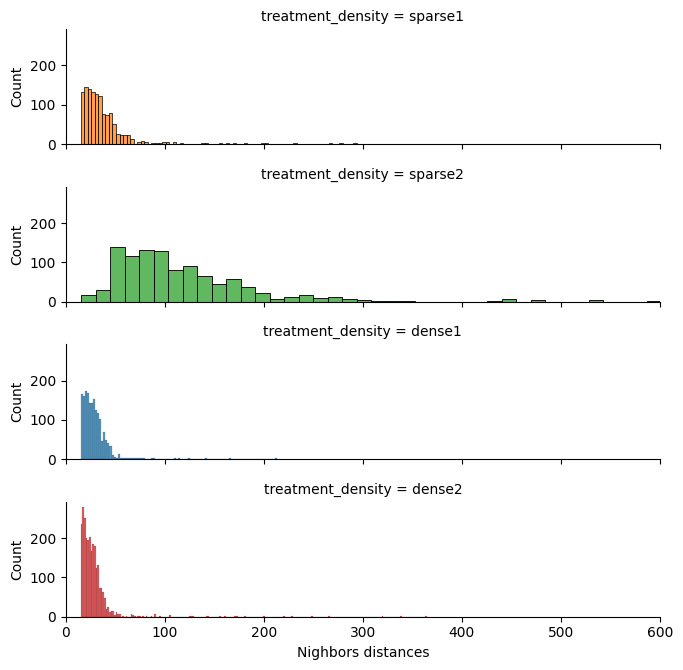

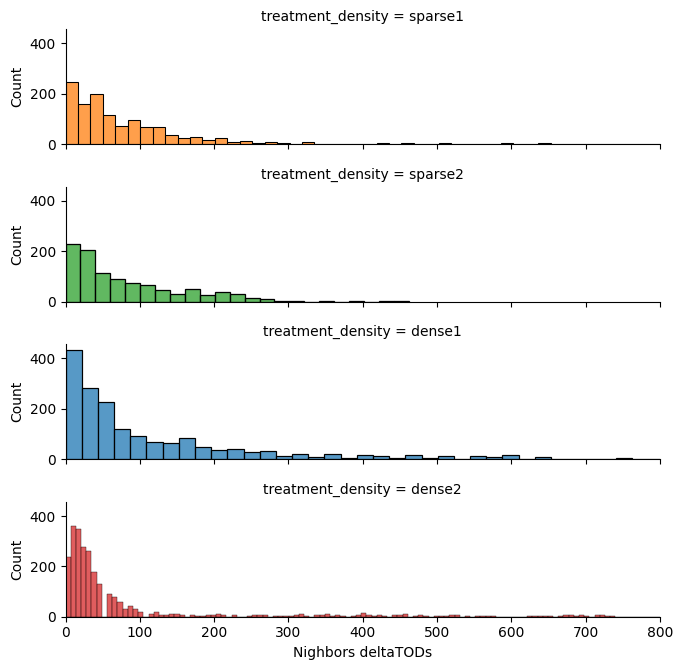

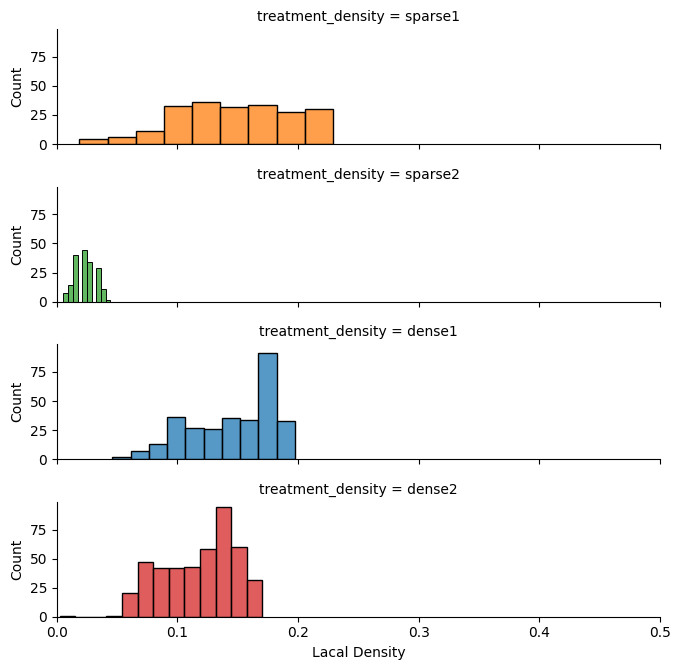

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="distances_values"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"], hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors distances')
g.set(xlim=(0,600))



g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="delta_tods_value"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Nighbors deltaTODs')
g.set(xlim=(0,800))

g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Lacal Density')
g.set(xlim=(0,0.5))

plt.show()

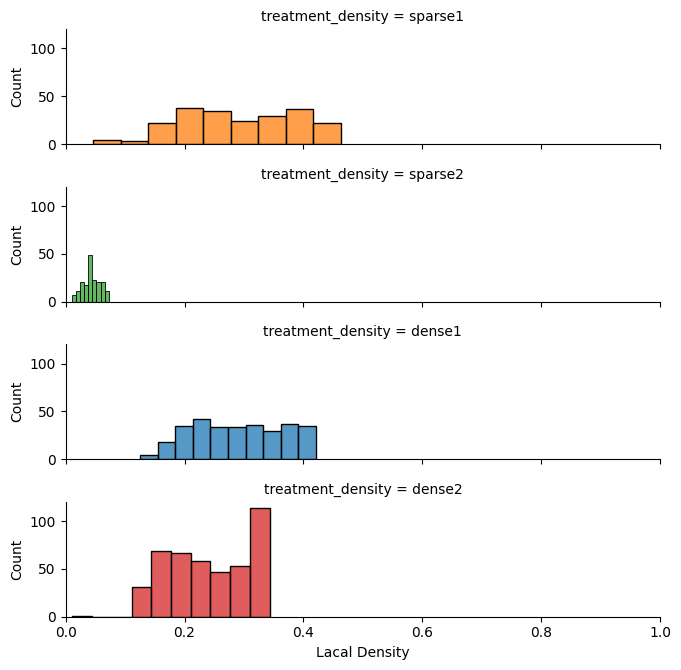

In [22]:
g = sns.FacetGrid(visualize_delta_tods_distances_local_densities_distribution_melted[visualize_delta_tods_distances_local_densities_distribution_melted["variable"]=="Local_density"], row="treatment_density", 
                  height=1.7, aspect=4,row_order=["sparse1","sparse2","dense1","dense2"],hue="treatment_density")
g.map(sns.histplot, "value")
plt.xlabel('Lacal Density')
g.set(xlim=(0,1.0))
g.set(ylim=(0,120))

plt.show()